In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sample = pd.read_parquet("/mnt/hdd1/wangjingqi/GD/train_landmark_files/16069/100015657.parquet")
sample_left_hand = sample[sample.type == "left_hand"]
sample_right_hand = sample[sample.type == "right_hand"]

3092.0303

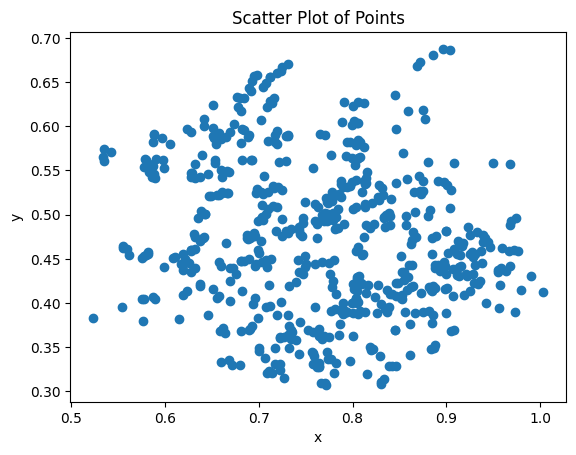

In [15]:
import matplotlib.pyplot as plt
from config import *
# 定义点的坐标
points = sample[sample.type == "left_hand"][["x","y"]].values#[LHAND + RHAND]

# 将点的坐标拆分成x和y的数组
x = [p[0] for p in points]
y = [p[1] for p in points]

# 绘制散点图
plt.scatter(x, y)

# 设置图形标题和坐标轴标签
plt.title('Scatter Plot of Points')
plt.xlabel('x')
plt.ylabel('y')

# 显示图形
plt.show()


In [16]:
import random
import torch
from config import *
class aug():
    def __init__(self,p=0.5):
        self.p = p
    def __call__(self,sample):
        sample = torch.from_numpy(sample)
        if random.random() < self.p:
            x = sample[:,0]
            x_max = x[~torch.isnan(x)].max()
            x_min = x[~torch.isnan(x)].min()
            x = x_max - x + x_min
            sample[:,0] = x
        
        return sample.numpy()


/mnt/hdd1/wangjingqi/anaconda3/envs/game/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
print(sample_left_hand.x.max(), sample_left_hand.x.min())
sample_left_hand.loc[:, ["x", "y"]] = aug(1)(sample_left_hand.loc[:, ["x", "y"]].values)
print(sample_left_hand.x.max(), sample_left_hand.x.min())

1.0036096572875977 0.5225991010665894
1.0036096572875977 0.5225991010665894


/tmp/ipykernel_187897/488690872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_left_hand.loc[:, ["x", "y"]] = aug(1)(sample_left_hand.loc[:, ["x", "y"]].values)


In [18]:
sample_left_hand.x

468      0.622359
469      0.713531
470      0.797695
471      0.874346
472      0.937618
           ...   
56956    0.694337
56957    0.559746
56958    0.608531
56959    0.643559
56960    0.654430
Name: x, Length: 2205, dtype: float64

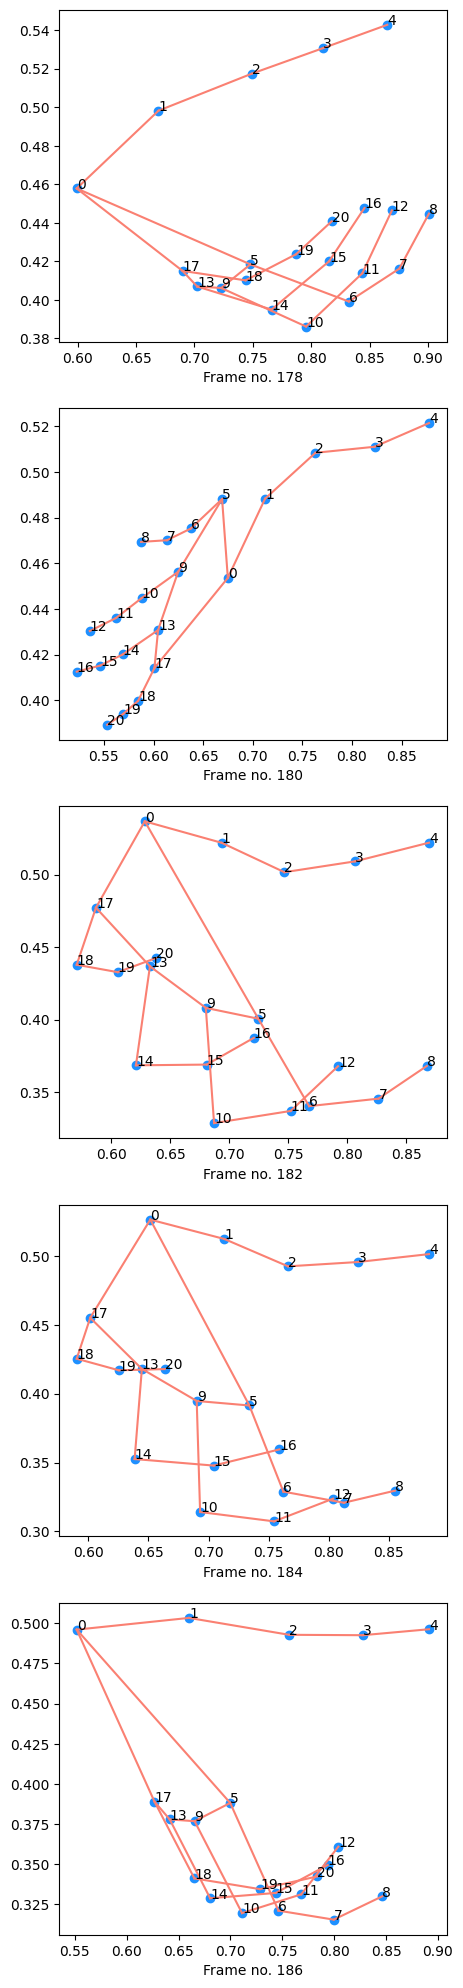

In [19]:

edges = [(0,1),(1,2),(2,3),(3,4),(0,5),(0,17),(5,6),(6,7),(7,8),(5,9),(9,10),(10,11),(11,12),
         (9,13),(13,14),(14,15),(15,16),(13,17),(17,18),(18,19),(19,20)]

def plot_frame(df, frame_id, ax):
    df = df[df.frame == frame_id].sort_values(['landmark_index'])
    x = list(df.x)
    y = list(df.y)
    
    ax.scatter(df.x, df.y, color='dodgerblue')
    for i in range(len(x)):
        ax.text(x[i], y[i], str(i))
        
    for edge in edges:
        ax.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], color='salmon')
        ax.set_xlabel(f"Frame no. {frame_id}")
        # ax.set_xticks([])
        # ax.set_yticks([])
        # ax.set_xticklabels([])
        # ax.set_yticklabels([])

    
def plot_frame_seq(df, frame_range, n_frames):
    frames = np.linspace(frame_range[0],frame_range[1],n_frames, dtype = int, endpoint=True)
    fig, ax = plt.subplots(n_frames, 1, figsize=(5,25))
    for i in range(n_frames):
        plot_frame(df, frames[i], ax[i])
        
    plt.show()

    
plot_frame_seq(sample_left_hand, (178,186), 5)